In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Housing.csv')

In [146]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [147]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [148]:
df.shape

(545, 13)

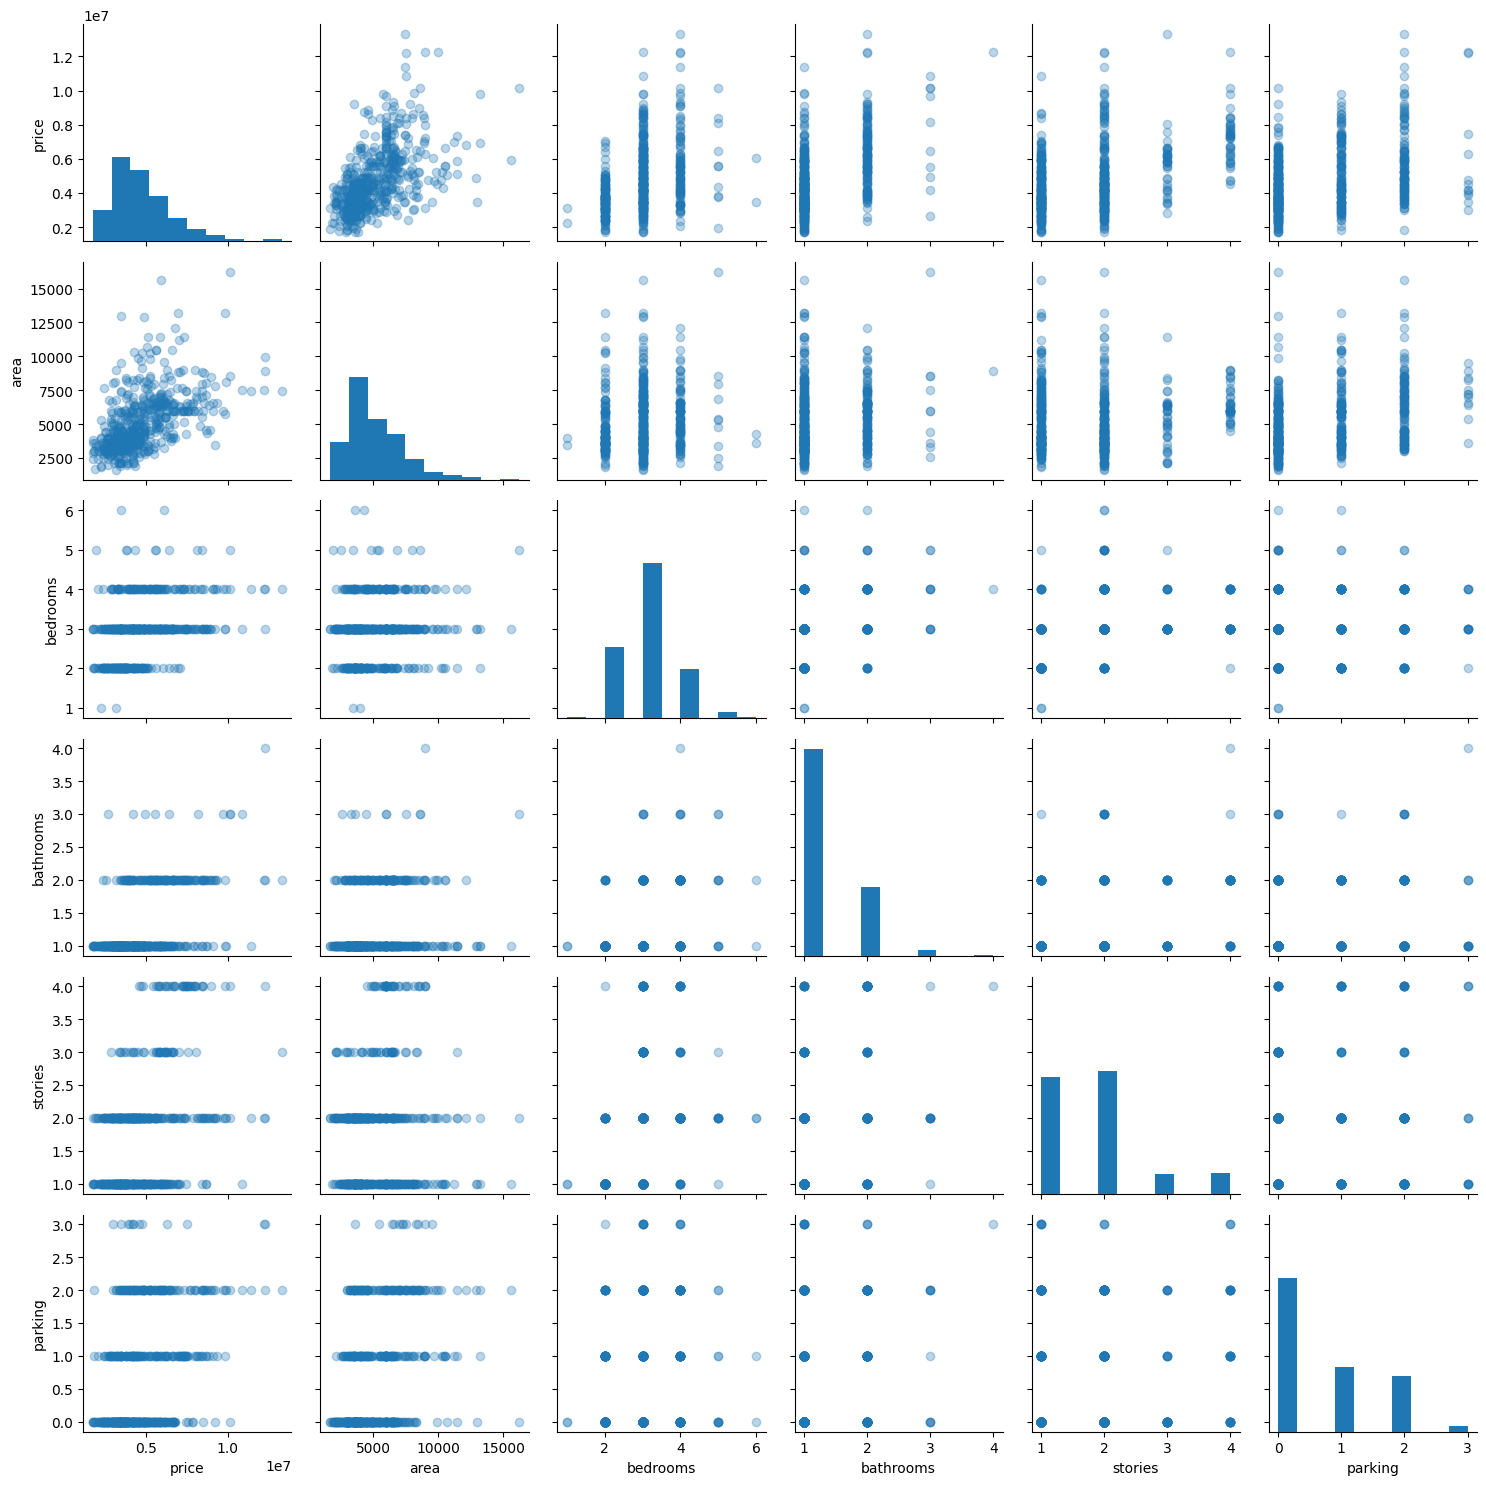

In [149]:
g = sns.PairGrid(data = df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter,alpha = 0.3)

In [150]:
mapping = {'yes': 1, 'no': 0 , 'furnished' : 1 , 'unfurnished' : 0 , 'semi-furnished' : .5}

df = df.replace(mapping)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [151]:
y = np.array(df['price']).reshape(-1, 1)
x = np.array(df.drop('price', axis=1))

In [170]:
print(x)
print(y)

[[7.42e+03 4.00e+00 2.00e+00 ... 2.00e+00 1.00e+00 1.00e+00]
 [8.96e+03 4.00e+00 4.00e+00 ... 3.00e+00 0.00e+00 1.00e+00]
 [9.96e+03 3.00e+00 2.00e+00 ... 2.00e+00 1.00e+00 5.00e-01]
 ...
 [3.62e+03 2.00e+00 1.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.91e+03 3.00e+00 1.00e+00 ... 0.00e+00 0.00e+00 1.00e+00]
 [3.85e+03 3.00e+00 1.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]]
[[13300000]
 [12250000]
 [12250000]
 [12215000]
 [11410000]
 [10850000]
 [10150000]
 [10150000]
 [ 9870000]
 [ 9800000]
 [ 9800000]
 [ 9681000]
 [ 9310000]
 [ 9240000]
 [ 9240000]
 [ 9100000]
 [ 9100000]
 [ 8960000]
 [ 8890000]
 [ 8855000]
 [ 8750000]
 [ 8680000]
 [ 8645000]
 [ 8645000]
 [ 8575000]
 [ 8540000]
 [ 8463000]
 [ 8400000]
 [ 8400000]
 [ 8400000]
 [ 8400000]
 [ 8400000]
 [ 8295000]
 [ 8190000]
 [ 8120000]
 [ 8080940]
 [ 8043000]
 [ 7980000]
 [ 7962500]
 [ 7910000]
 [ 7875000]
 [ 7840000]
 [ 7700000]
 [ 7700000]
 [ 7560000]
 [ 7560000]
 [ 7525000]
 [ 7490000]
 [ 7455000]
 [ 7420000]
 [ 7420000]
 [ 7420000]
 [ 7

In [153]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    # Calculate the index to split the data
    split_index = int(len(X) * (1 - test_size))
    
    X_train = X[:split_index]
    X_test = X[split_index:]
    y_train = y[:split_index]
    y_test = y[split_index:]
    
    return X_train, X_test, y_train, y_test
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
y_mean = np.mean(y)
y_std = np.std(y)
X_train = (X - X_mean) / X_std
y_train = (y - y_mean) / y_std
X_train, y_train 
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [162]:
def compute_cost(X, y, w, b):
    m = len(y)
    y_pred = np.dot(X, w) + b
    cost = np.sum((y_pred - y) ** 2) / (2 * m)
    return cost

In [163]:
cost = compute_cost(x, y, w_init, b_init)
print(f'Cost w : {cost}')

Cost w : 7138597578063281.0


In [164]:
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    
    m = len(y)
    costs = []
    
    for i in range(num_iterations):
        y_pred = np.dot(X, w) + b
        dw = np.dot(X.T, (y_pred - y)) / m
        db = np.sum(y_pred - y) / m
        
        w -= learning_rate * dw
        b -= learning_rate * db
        
        cost = compute_cost(X, y, w, b)
        costs.append(cost)
        
        if (i+1) % 100 == 0:
            print(f"Cost after iteration {i+1}: {cost}")
    
    return w, b, costs

In [165]:
def train_model(X_train, y_train, learning_rate, num_iterations):

    n = X_train.shape[1]
    w = np.zeros((n, 1))
    b = 0
    
    w, b, costs = gradient_descent(X_train, y_train, w, b, learning_rate, num_iterations)
    return w, b, costs

In [166]:
def predict(X, w, b):

    y_pred = np.dot(X, w) + b
    return y_pred

In [171]:
learning_rate = 0.01
num_iterations = 1000
w, b, costs = train_model(X_train, y_train, learning_rate, num_iterations)

y_pred = predict(X_test, w, b)

Cost after iteration 100: 0.05893766263627662
Cost after iteration 200: 0.03342080584831254
Cost after iteration 300: 0.019743350482785076
Cost after iteration 400: 0.011789215619891791
Cost after iteration 500: 0.007074094638113884
Cost after iteration 600: 0.004255181464999984
Cost after iteration 700: 0.002562928004102851
Cost after iteration 800: 0.0015448312014622256
Cost after iteration 900: 0.0009315817802346365
Cost after iteration 1000: 0.0005619296531524697


In [172]:
print(y_pred)

[[-0.76517141]
 [-0.77509073]
 [-0.82862138]
 [-0.83359641]
 [-0.79909237]
 [-0.81408491]
 [-0.81015512]
 [-0.84153615]
 [-0.84245864]
 [-0.87182122]
 [-0.82187944]
 [-0.8745575 ]
 [-0.85196294]
 [-0.87481399]
 [-0.8416398 ]
 [-0.84456848]
 [-0.79326091]
 [-0.86880736]
 [-0.82520622]
 [-0.85184119]
 [-0.88271459]
 [-0.88734899]
 [-0.8716725 ]
 [-0.89061789]
 [-0.85672551]
 [-0.85307023]
 [-0.90572861]
 [-0.89100395]
 [-0.83818546]
 [-0.92336542]
 [-0.94881839]
 [-0.91426688]
 [-0.94947105]
 [-0.9340659 ]
 [-0.94892495]
 [-0.92559426]
 [-0.90452363]
 [-0.90749045]
 [-0.94914719]
 [-0.95534645]
 [-0.91890083]
 [-0.96628974]
 [-0.97184365]
 [-0.98075941]
 [-0.97289102]
 [-1.00347888]
 [-0.98366067]
 [-0.93595414]
 [-1.03587728]
 [-1.01326412]
 [-0.99257845]
 [-0.98347487]
 [-0.97662136]
 [-1.02751104]
 [-0.98228922]
 [-1.04916215]
 [-1.01756278]
 [-1.0472999 ]
 [-1.05632789]
 [-1.05698674]
 [-1.09844964]
 [-1.11670868]
 [-1.11614825]
 [-1.04487589]
 [-1.12815647]
 [-1.14884943]
 [-1.11278

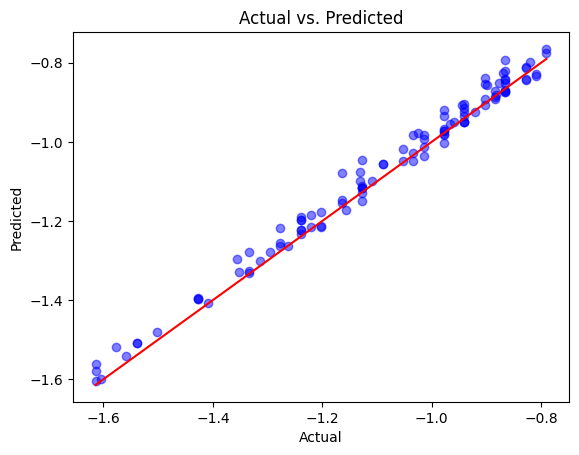

In [173]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()
